# Evaluation of the `HaGraD`-Optimizer with Mnist-Dataset
---

## Imports and Data-Preparation

In [1]:
## Tensorflow related
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

## General
import numpy as np
import matplotlib.pyplot as plt

## Hagrad custom optimizer
import sys; 
if "..\\" not in sys.path: sys.path.append("..\\")
from src.hagrad import Hagrad
from src.kinetic_energy_gradients import KineticEnergyGradients

In [2]:
## Fetch Mnist-Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape  == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape  == (10000,)

In [3]:
## Class number sanity check
num_classes = 10
assert set(np.unique(y_train)) == set(np.arange(num_classes))

## Normalizing and expanding dimensions for ConvLayers
def normalize_img_data(X: np.ndarray) -> np.ndarray:
    X = X.astype(np.float32) / 255.
    X = np.expand_dims(X, -1)
    return X

X_train = normalize_img_data(X_train)
X_test  = normalize_img_data(X_test)

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

---

## Defining the Model

In [4]:
## Using a standard Dense-Model here - sufficient for mnist.
def fully_connected_NN(
    input_shape: tuple,
    num_classes: int,
    optimizer: keras.optimizers.Optimizer,
    print_summary: bool=False) -> keras.Model:

    ## Defining the Model with Sequential API
    model = keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(num_classes, activation="softmax")
    ])
    
    ## Compiling the Model using the given Optimizer
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(), 
        optimizer=optimizer, 
        metrics=["accuracy"])

    ## Optional: Print Model summary
    if print_summary: print(model.summary())

    return model


---

## Train the Network using different Optimizers

In [5]:
## Settings
batch_size  = 128
epochs      = 50
input_shape = X_train.shape[1:]

In [6]:
## Wrappers
def model_optimizer(optimizer):
    model = fully_connected_NN(
        input_shape=input_shape, 
        num_classes=num_classes, 
        optimizer=optimizer, 
        print_summary=False)
    return model

def model_fit(model, verbose=2):
    fit = model.fit(
        X_train, y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_data=(X_train, y_train), 
        verbose=verbose)
    return fit

#### Adam

In [16]:
keras.backend.clear_session()
model_adam = model_optimizer(keras.optimizers.Adam())
fit_adam = model_fit(model_adam)

Epoch 1/50
469/469 - 4s - loss: 0.3792 - accuracy: 0.8903 - val_loss: 0.2867 - val_accuracy: 0.9215
Epoch 2/50
469/469 - 2s - loss: 0.3079 - accuracy: 0.9136 - val_loss: 0.2819 - val_accuracy: 0.9191
Epoch 3/50
469/469 - 2s - loss: 0.2957 - accuracy: 0.9168 - val_loss: 0.2843 - val_accuracy: 0.9202
Epoch 4/50
469/469 - 2s - loss: 0.2913 - accuracy: 0.9172 - val_loss: 0.2721 - val_accuracy: 0.9242
Epoch 5/50
469/469 - 2s - loss: 0.2846 - accuracy: 0.9201 - val_loss: 0.2720 - val_accuracy: 0.9237
Epoch 6/50
469/469 - 2s - loss: 0.2824 - accuracy: 0.9209 - val_loss: 0.2612 - val_accuracy: 0.9272
Epoch 7/50
469/469 - 2s - loss: 0.2784 - accuracy: 0.9215 - val_loss: 0.2777 - val_accuracy: 0.9193
Epoch 8/50
469/469 - 2s - loss: 0.2775 - accuracy: 0.9216 - val_loss: 0.2646 - val_accuracy: 0.9247
Epoch 9/50
469/469 - 2s - loss: 0.2757 - accuracy: 0.9229 - val_loss: 0.2748 - val_accuracy: 0.9201
Epoch 10/50
469/469 - 2s - loss: 0.2753 - accuracy: 0.9224 - val_loss: 0.2554 - val_accuracy: 0.9248

### SGD

In [17]:
keras.backend.clear_session()
model_sgd = model_optimizer(keras.optimizers.SGD())
fit_sgd = model_fit(model_sgd)

Epoch 1/50
469/469 - 2s - loss: 0.7688 - accuracy: 0.7885 - val_loss: 0.4408 - val_accuracy: 0.8771
Epoch 2/50
469/469 - 2s - loss: 0.3967 - accuracy: 0.8877 - val_loss: 0.3642 - val_accuracy: 0.8960
Epoch 3/50
469/469 - 2s - loss: 0.3513 - accuracy: 0.8992 - val_loss: 0.3361 - val_accuracy: 0.9027
Epoch 4/50
469/469 - 2s - loss: 0.3307 - accuracy: 0.9043 - val_loss: 0.3214 - val_accuracy: 0.9077
Epoch 5/50
469/469 - 2s - loss: 0.3183 - accuracy: 0.9087 - val_loss: 0.3115 - val_accuracy: 0.9113
Epoch 6/50
469/469 - 2s - loss: 0.3098 - accuracy: 0.9115 - val_loss: 0.3028 - val_accuracy: 0.9137
Epoch 7/50
469/469 - 2s - loss: 0.3032 - accuracy: 0.9142 - val_loss: 0.2975 - val_accuracy: 0.9155
Epoch 8/50
469/469 - 2s - loss: 0.2979 - accuracy: 0.9152 - val_loss: 0.2952 - val_accuracy: 0.9166
Epoch 9/50
469/469 - 2s - loss: 0.2940 - accuracy: 0.9167 - val_loss: 0.2895 - val_accuracy: 0.9180
Epoch 10/50
469/469 - 2s - loss: 0.2899 - accuracy: 0.9184 - val_loss: 0.2869 - val_accuracy: 0.9190

### HaGraD

In [7]:
keras.backend.clear_session()
hagrad_optimizer = Hagrad()
print(hagrad_optimizer.get_config())
model_hagrad = model_optimizer(hagrad_optimizer)
fit_hagrad = model_fit(model_hagrad)

{'name': 'hagrad', 'epsilon': 1.0, 'gamma': 10.0, 'delta': 0.09090909090909091, 'kinetic_energy_gradient': 'Relativistic kinetic energy sqrt( ||p||^2 + 1 )-1 with gradient p/sqrt( ||p||^2 + 1 )'}
Epoch 1/50
469/469 - 4s - loss: 0.4189 - accuracy: 0.8780 - val_loss: 0.3203 - val_accuracy: 0.9047
Epoch 2/50
469/469 - 3s - loss: 0.3137 - accuracy: 0.9100 - val_loss: 0.3127 - val_accuracy: 0.9118
Epoch 3/50
469/469 - 3s - loss: 0.3038 - accuracy: 0.9134 - val_loss: 0.2840 - val_accuracy: 0.9202
Epoch 4/50
469/469 - 3s - loss: 0.2944 - accuracy: 0.9172 - val_loss: 0.2878 - val_accuracy: 0.9176
Epoch 5/50
469/469 - 3s - loss: 0.2884 - accuracy: 0.9182 - val_loss: 0.2843 - val_accuracy: 0.9209
Epoch 6/50
469/469 - 3s - loss: 0.2844 - accuracy: 0.9197 - val_loss: 0.2962 - val_accuracy: 0.9162
Epoch 7/50
469/469 - 3s - loss: 0.2827 - accuracy: 0.9193 - val_loss: 0.2984 - val_accuracy: 0.9138
Epoch 8/50
469/469 - 3s - loss: 0.2792 - accuracy: 0.9214 - val_loss: 0.2618 - val_accuracy: 0.9258
Epoc

---

## Visualizing

Keras is evaluating the validation error at the end of each epoch. Therefore teh validation errors get shifted for the visualization:

In [24]:
epochs_arr = np.arange(epochs)
epochs_arr_val = epochs_arr + 1

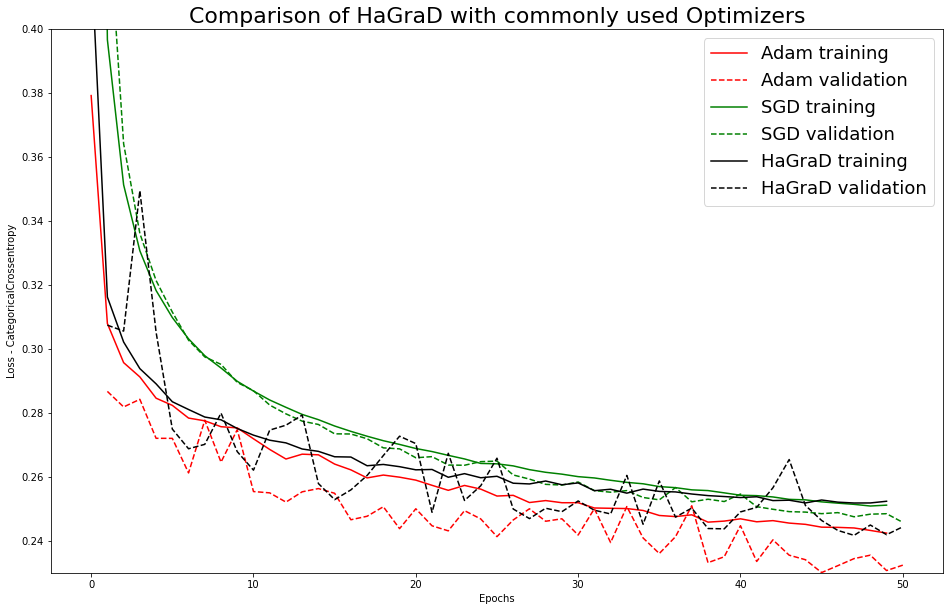

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Comparison of HaGraD with commonly used Optimizers", fontsize=22)
ax.plot(epochs_arr,     fit_adam.history['loss'],       "r-",  label="Adam training") 
ax.plot(epochs_arr_val, fit_adam.history['val_loss'],   "r--", label="Adam validation") 
ax.plot(epochs_arr,     fit_sgd.history['loss'],        "g-",  label="SGD training") 
ax.plot(epochs_arr_val, fit_sgd.history['val_loss'],    "g--", label="SGD validation") 
ax.plot(epochs_arr,     fit_hagrad.history['loss'],     "k-",  label="HaGraD training") 
ax.plot(epochs_arr_val, fit_hagrad.history['val_loss'], "k--", label="HaGraD validation") 
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss - CategoricalCrossentropy")
ax.set_ylim(bottom=0.23, top=0.4)
leg = ax.legend(frameon=True, fontsize=18)
plt.show()
plt.close()

---